<div class="h1">Machine Learning Exam - Exercise 2</div> <a name="top"></a>
<div class="lead">PBA in Software Development, Business Academy Aarhus<br><small>Niels Wadsholt, May 2018</small></div>

## Table of contents <a name="table-of-content"></a>
1. [A. Getting to know the data and the problem](#Part-A)
    -  [A.1 Loading the dataset](#Part-A1)
2. [B. Cleaning the data](#Part-B)
    -  [B.1 Selecting features](#Part-B1)
    -  [B.2 Analyzing relationships between features](#Part-B2)
    -  [B.3 Removing features](#Part-B3)
    -  [B.4 Data conversion](#Part-B4)
    -  [B.5 Missing data](#Part-B5)
    -  [B.6 Splitting up the data](#Part-B6)
    -  [B.7 Feature scaling](#Part-B7)
3. [C. Choosing a model and training it](#Part-C)
4. [D. Evaluating performance on the test set](#Part-D)
5. [E. Experiments](#Part-E)
    -  [E.1 Vary number of nodes and layers](#Part-E1)
    -  [E.2 Vary batch size](#Part-E2)
    -  [E.3 Vary number of epochs](#Part-E3)
    -  [E.4 Vary the learning rate](#Part-E4)
    -  [E.5 Vary the activation function](#Part-E5)
    -  [E.6 Adjusting the regularization term *alpha*](#Part-E6)
    -  [E.7 Cross-validation](#Part-E7)
    -  [E.8 Other algorithms](#Part-E8)
6. [Conclusion](#Conclusion)
7. [A final note of caution](#Final-note)
8. [References](#References)

## A. Getting to know the data and the problem<a name="Part-A"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

Survival of the Titanic disaster is a **binary classification** problem with two possible outcomes: A passenger either survived or didn't.

Because the data set includes *labels* in the 'Survived' column, it is a **supervised learning** problem in which we can train a model using the actual outcomes in the training set and then test it on those from the test set.

The dataset consists of 11 features, not including the output value 'Survived':
- *PassengerId*
- *Pclass* (passenger class)
- *Name*
- *Sex*
- *Age*
- *SibSp* (# of siblings / spouses aboard)
- *Parch* (# of parents / children aboard)
- *Ticket* (a ticket id)
- *Fare* (the price paid)
- *Cabin* (cabin number)
- *Embarked* (port city where the passenger embarked)

**Labels**:<br>
There is only one labelled column, *Survival*. While it certainly is possible to train a model to predict something other than survival (e.g. passenger class), the stated goal in this assignment is to predict survival. 

### A.1 Loading the dataset<a name="Part-A1"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

First, let's load the dataset into a pandas data frame:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

data_url = "http://pbawebaarhus.dk/ml/titanic_800.csv"
data = pd.read_csv(data_url, sep=",", header=0)

We can then have a quick look at the first few rows of data:

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


... and another arbitrary sample:

In [3]:
data[data.columns[:]][250:255]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S


Two things immediately stand out:
- The age and cabin columns contain null values
- The fare column values vary widely

We can also take a look at the core statistics:

In [4]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,800.0000,800.0000,800.000000,800,800,637.000000,800.000000,800.000000,800,800.000000,185,799
unique,NaN,NaN,NaN,800,2,NaN,NaN,NaN,625,NaN,136,3
top,NaN,NaN,NaN,"Molson, Mr. Harry Markland",male,NaN,NaN,NaN,CA 2144,NaN,G6,S
freq,NaN,NaN,NaN,1,517,NaN,NaN,NaN,6,NaN,4,577
mean,400.5000,0.3850,2.305000,NaN,NaN,29.871146,0.518750,0.373750,NaN,4284.720098,NaN,NaN
std,231.0844,0.4869,0.836869,NaN,NaN,14.544301,1.063514,0.801476,NaN,23284.591578,NaN,NaN
min,1.0000,0.0000,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,200.7500,0.0000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN
50%,400.5000,0.0000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,19.966700,NaN,NaN
75%,600.2500,1.0000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,57.244800,NaN,NaN


A few things to note here:
- There are 800 passengers but only 625 unique tickets, and the top ticket CA 2144 has 6 occurencies
- The fare ranges from 0 to 262375
- The top cabin 'C23 C25 C27' has 4 occurencies

## B. Cleaning the data<a name="Part-B"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

### B.1 Selecting features<a name="Part-B1"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

Because each feature slows down the training, and because unimportant or distorting features can hurt the model's prediction accuracy, feature selection is naturally very important.

Of all the features, **PassengerId**, **Name** and **Ticket** are probably the least likely to tell anything valueable about survival and can safely be filtered out.

Or can they? Let's briefly look at possible counter arguments:
1. PassengerId: The id numbers are consecutive starting from 1. Could it be that the safest cabins aboard were filled first and a lower id therefore means higher survival chance?
2. Name: Could there be some underlying patterns here related to socioeconomic status and/or genetic features that again had an impact on survival chances?
3. Ticket: Could ticket numbers hide valuable information? Some of them contain letters, some don't. Is that significant? As noted above, there are more passengers than tickets. What is the implication of that?

Regarding PassengerId: This can eaily be tested.<br>
Regarding Name: Maybe, but as the number of possible surnames is huge, the dataset would probably have to be considerably larger to reveal such patterns.<br>
Regarding Ticket: There is enough here to merit further investigation.

On the other side of the spectrum, the most obvious candidates to reveal something valueable about survival are **Age**, **Sex** and **Pclass**.

**Fare** and **Cabin**, like Pclass, likely holds information related to socioeconomic status.

The value of **SibSp**, **Parch** and **Embarked** is harder to predict and must be determined through testing.

### B.2 Analyzing relationships between features<a name="Part-B2"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
To examine each feature's influence on survival, we can simply plot each of them against it.

#### PassengerId
Let's start by testing one of the more far-fetched theories discussed above, the correlation between passenger id and survival:

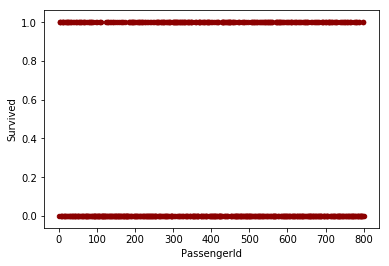

In [5]:
x_lbl = 'PassengerId'
y_lbl = 'Survived'

plt.figure()
plt.scatter(data[x_lbl], data[y_lbl], color='darkred', s=20)
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.show()

The result is pretty convincing in it's refusal of a correlation. PassengerId is out.

#### Passenger class
\- What is interesting here is of course the survival _percentage_ for the three classes:

In [6]:
survivors_by_pclass = data[data['Survived'] == 1]['Pclass'].value_counts()
all_by_pclass = data['Pclass'].value_counts()
survived_pct_by_pclass = survivors_by_pclass.copy()

for key in survivors_by_pclass.keys():
    survived_pct_by_pclass[key] = 100 * survived_pct_by_pclass[key] / all_by_pclass[key]

survived_pct_by_pclass

1    61
3    24
2    48
Name: Pclass, dtype: int64

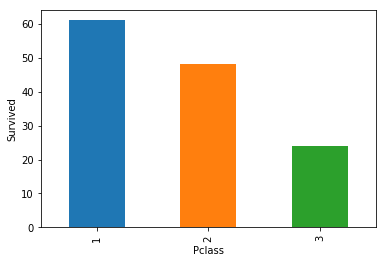

In [7]:
survived_pct_by_pclass.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

As expected, there is a strong correlation between passenger class and survival. Pclass is in.

#### Age
It seems selv-evident that there must be a correlation between  age and survival, but apart from the highest age range, plotting age directly vs. survival does not look entirely convincing:

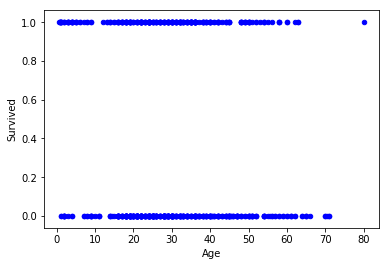

In [8]:
x_lbl = 'Age'
y_lbl = 'Survived'

plt.figure()
plt.scatter(data[x_lbl], data[y_lbl], color='blue', s=20)
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.show()

To gain confidence that there in fact is a correlation, we can look at the correlation with passenger class, which we just established *did* have a correlation with survival:

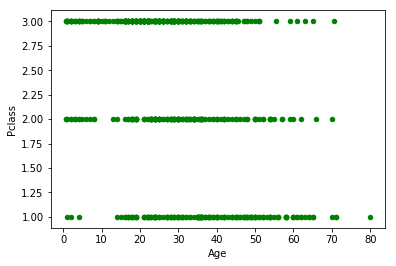

In [9]:
x_lbl = 'Age'
y_lbl = 'Pclass'

plt.figure()
plt.scatter(data[x_lbl], data[y_lbl], color='green', s=20)
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.show()

This reveals not too surprisingly a fairly clear correlation between age and passenger class. If nothing else, age must then at least be guilty by association. Age is in.

#### Sex
Let's try the same for sex as we did for passenger class:

In [10]:
survivors_by_gender = data[data['Survived'] == 1]['Sex'].value_counts()
all_by_gender = data['Sex'].value_counts()
survived_pct_by_gender = survivors_by_gender.copy()

In [11]:
for key in survivors_by_gender.keys():
    survived_pct_by_gender[key] = 100 * survivors_by_gender[key] / all_by_gender[key]

survived_pct_by_gender

female    74
male      18
Name: Sex, dtype: int64

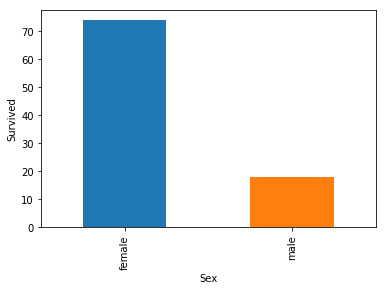

In [12]:
survived_pct_by_gender.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

The result could not have been clearer. Sex is in.

#### Siblings and spouses
What about siblings and spouses?

In [13]:
survivors_by_sibsp = data[data['Survived'] == 1]['SibSp'].value_counts()
all_by_sibsp = data['SibSp'].value_counts()
survived_pct_by_sibsp = survivors_by_sibsp.copy()

In [14]:
for key in survivors_by_sibsp.keys():
    survived_pct_by_sibsp[key] = 100 * survivors_by_sibsp[key] / all_by_sibsp[key]

survived_pct_by_sibsp

0    34
1    51
2    48
3    26
4    20
Name: SibSp, dtype: int64

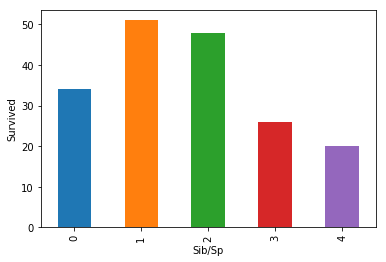

In [15]:
survived_pct_by_sibsp.plot(kind='bar')
plt.xlabel('Sib/Sp')
plt.ylabel('Survived')
plt.show()

It appears that having a spouse or one or two siblings increases the chance of survival while it decreases with a high number of siblings. SibSp is in.

#### Parents and children
Next, let's have a look at parents and children:

In [16]:
survivors_by_parch = data[data['Survived'] == 1]['Parch'].value_counts()
all_by_parch = data['Parch'].value_counts()
survived_pct_by_parch = survivors_by_parch.copy()

In [17]:
for key in survivors_by_parch.keys():
    survived_pct_by_parch[key] = 100 * survivors_by_parch[key] / all_by_parch[key]

survived_pct_by_parch

0    35
1    51
2    52
3    50
5    25
Name: Parch, dtype: int64

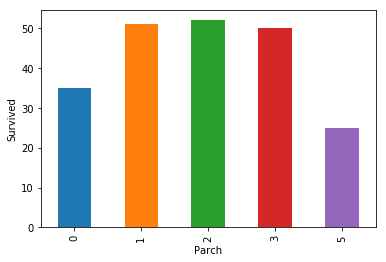

In [18]:
survived_pct_by_parch.plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.show()

As with siblings and spouses, a number in the middle appears to yield the best survival chance. Parch is in.

#### Fare and ticket
As noted before, there are huge flunctuations in the fare column. At the same time, there are more passengers than tickets. Could the two be connected?

Let's examine this by comparing the top 20 of those rows with the bottom 20:

In [19]:
data[['Survived', 'Ticket', 'Fare']].nlargest(20, ['Fare'])

,Survived,Ticket,Fare
311,1,PC 17608,262375.0
742,1,PC 17608,262375.0
380,1,PC 17757,227525.0
557,0,PC 17757,227525.0
700,1,PC 17757,227525.0
716,1,PC 17757,227525.0
215,1,35273,113275.0
393,1,35273,113275.0
659,0,35273,113275.0
537,1,PC 17761,106425.0


In [20]:
data[['Survived', 'Ticket', 'Fare']].nsmallest(20, ['Fare'])

,Survived,Ticket,Fare
179,0,LINE,0.0000
263,0,112059,0.0000
271,1,LINE,0.0000
277,0,239853,0.0000
302,0,LINE,0.0000
413,0,239853,0.0000
466,0,239853,0.0000
481,0,239854,0.0000
597,0,LINE,0.0000
633,0,112052,0.0000


This is interesting. It appears that several passengers can share the same ticket while the fare refers to the *ticket* - **not** the individual *passenger*!

This means that values in the fare column should be divided by the number of passengers sharing the same ticket. Of course some might have a larger share of ticket fares than others, but splitting the bills evenly should be good enough.

To do this, let's first get a list of ticket occurency frequencies:

In [21]:
ticket_freq = data['Ticket'].value_counts()
ticket_freq.nlargest(10)

CA 2144         6
CA. 2343        5
S.O.C. 14879    5
347082          5
347088          5
3101295         5
1601            5
382652          4
W./C. 6608      4
19950           4
Name: Ticket, dtype: int64

We can then use this to divide each passenger's fare by the number of ticket occurencies:

In [22]:
ticket_freq_by_passenger = data['Ticket'].apply(lambda x: ticket_freq[x])
divided_fares = data['Fare'].div(ticket_freq_by_passenger, 1)
divided_fares.head(10)

0       7.25000
1      71.28330
2    7925.00000
3      26.55000
4       8.05000
5       8.45830
6      51.86250
7    5268.75000
8       5.56665
9      15.03540
dtype: float64

To verify, let's compare with the original fares:

In [23]:
data[['Survived', 'Ticket', 'Fare']].head(10)

,Survived,Ticket,Fare
0,0,A/5 21171,7.2500
1,1,PC 17599,71.2833
2,1,STON/O2. 3101282,7925.0000
3,1,113803,53.1000
4,0,373450,8.0500
5,0,330877,8.4583
6,0,17463,51.8625
7,0,349909,21075.0000
8,1,347742,11.1333
9,1,237736,30.0708


Rows 3, 7, 8 and 9 have been divided. If done correctly, the ticket frequency of ticket # 349909 (row 7) should be 4:

In [24]:
ticket_freq['349909']

4

Having verified the new divided fare column, we can insert it into the dataset:

In [25]:
data['PsgFare'] = divided_fares
data[['Survived', 'Ticket', 'PsgFare']].head(10)

,Survived,Ticket,PsgFare
0,0,A/5 21171,7.25000
1,1,PC 17599,71.28330
2,1,STON/O2. 3101282,7925.00000
3,1,113803,26.55000
4,0,373450,8.05000
5,0,330877,8.45830
6,0,17463,51.86250
7,0,349909,5268.75000
8,1,347742,5.56665
9,1,237736,15.03540


Finally, lets test the updated *Fare* column against *Survived*:

In [26]:
survivors_by_fare = data[data['Survived'] == 1]['PsgFare'].value_counts()
all_by_fare = data['PsgFare'].value_counts()
survived_pct_by_fare = survivors_by_fare.copy()

In [27]:
for key in survivors_by_fare.keys():
    survived_pct_by_fare[key] = 100 * survivors_by_fare[key] / all_by_fare[key]

# survived_pct_by_fare

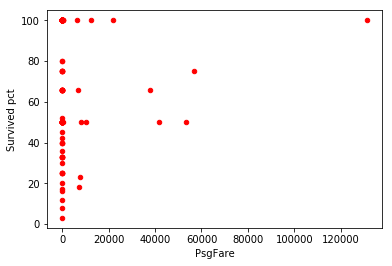

In [28]:
plt.scatter(survived_pct_by_fare.index, survived_pct_by_fare, color='red', s=20)
plt.xlabel('PsgFare')
plt.ylabel('Survived pct')

plt.show()

Even though the fare column is now divided by number of ticket holders, the values are still spread out unevenly with most close to zero, but at least there is a visible trend: Higher fares means higher chance of survival.

To be sure that the trend holds, we can zoom in on the lower part of the fare axis:

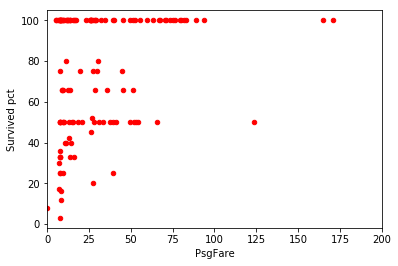

In [29]:
plt.scatter(survived_pct_by_fare.index, survived_pct_by_fare, color='red', s=20)
plt.xlabel('PsgFare')
plt.ylabel('Survived pct')
plt.gca().set_xlim(0,200)

plt.show()

#### Cabin

The cabin column is arguably one of the most interesting, but also most difficult to handle. It likely holds information, but most rows are null while others contain several values.

So what information does a cabin number hold? A quick internet search reveals that the letters stand for decks (see https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html).

This is very likely to have an impact on survival, so let's try to test that. First, we need to extract only the first letter of each row:

In [30]:
passenger_deck = data['Cabin'].str[0]
passenger_deck.head(10)

0    NaN
1      C
2    NaN
3      C
4    NaN
5    NaN
6      E
7    NaN
8    NaN
9    NaN
Name: Cabin, dtype: object

We can then insert the new Deck column:

In [31]:
data['Deck'] = passenger_deck
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PsgFare,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,7925.0000,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.5500,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,NaN


Of course this means that we have discarded the number after the deck, which itself undoubtedly holds valuable information about where on the deck the cabin was. However, for the sake of simplicity, the deck will do here.

Next, let's test the correlation with survival:

In [32]:
survivors_by_deck = data[data['Survived'] == 1]['Deck'].value_counts()
all_by_deck = data['Deck'].value_counts()
survived_pct_by_deck = survivors_by_deck.copy()

In [33]:
for key in survivors_by_deck.keys():
    survived_pct_by_deck[key] = 100 * survivors_by_deck[key] / all_by_deck[key]
survived_pct_by_deck.sort_index(inplace=True)

survived_pct_by_deck

A    53
B    75
C    56
D    73
E    71
F    61
G    50
Name: Deck, dtype: int64

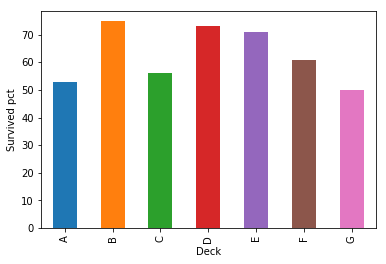

In [34]:
survived_pct_by_deck.plot(kind='bar')
plt.xlabel('Deck')
plt.ylabel('Survived pct')
plt.show()

Apart from decks A and C, the numbers look reasonable. The relatively low numbers for A and C could simply be statistical fluctiations due to the relatively low number of cabins.

#### Embarked
Finally, let's look at the *Embarked* column. Does the city each passenger embarked from have any significance?

In [35]:
survivors_by_emb = data[data['Survived'] == 1]['Embarked'].value_counts()
all_by_emb = data['Embarked'].value_counts()
survived_pct_by_emb = survivors_by_emb.copy()

In [36]:
for key in survivors_by_emb.keys():
    survived_pct_by_emb[key] = 100 * survivors_by_emb[key] / all_by_emb[key]

survived_pct_by_emb

S    34
C    53
Q    39
Name: Embarked, dtype: int64

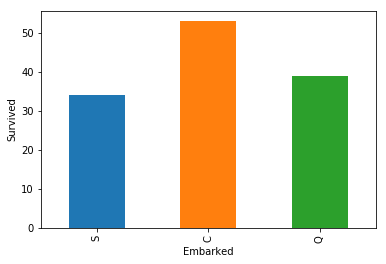

In [37]:
survived_pct_by_emb.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

There certainly appears to be some variation in the data here, too. If it is significant or purely coincidental is hard to tell, but it is good enough for now. Embarked is in.

### B.3 Removing features<a name="Part-B3"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

Having considered the value of each feature, we can now safely remove PassengerId, Name, Ticket and Cabin:

In [38]:
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('Fare', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PsgFare,Deck
0,0,3,male,22.0,1,0,S,7.2500,NaN
1,1,1,female,38.0,1,0,C,71.2833,C
2,1,3,female,26.0,0,0,S,7925.0000,NaN
3,1,1,female,35.0,1,0,S,26.5500,C
4,0,3,male,35.0,0,0,S,8.0500,NaN


### B.4 Data conversion<a name="Part-B4"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

The data currently has the following data types:

In [39]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
PsgFare     float64
Deck         object
dtype: object

To be able to compare values computationally, non-numerical types will have to be converted:

In [40]:
data['Sex'] = data['Sex'].replace(['female'], 1.0)
data['Sex'] = data['Sex'].replace(['male'], 0.0)

In [41]:
data['Embarked'] = data['Embarked'].replace(['S'], 0)
data['Embarked'] = data['Embarked'].replace(['C'], 1)
data['Embarked'] = data['Embarked'].replace(['Q'], 2)

In [42]:
data['Deck'] = data['Deck'].replace(['A'], 1)
data['Deck'] = data['Deck'].replace(['B'], 2)
data['Deck'] = data['Deck'].replace(['C'], 3)
data['Deck'] = data['Deck'].replace(['D'], 4)
data['Deck'] = data['Deck'].replace(['E'], 5)
data['Deck'] = data['Deck'].replace(['F'], 6)
data['Deck'] = data['Deck'].replace(['G'], 7)
data['Deck'] = data['Deck'].replace(['T'], 8)

In [43]:
data.dtypes

Survived      int64
Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Embarked    float64
PsgFare     float64
Deck        float64
dtype: object

In [44]:
data.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PsgFare,Deck
0,0,3,0.0,22.0,1,0,0.0,7.2500,NaN
1,1,1,1.0,38.0,1,0,1.0,71.2833,3.0
2,1,3,1.0,26.0,0,0,0.0,7925.0000,NaN
3,1,1,1.0,35.0,1,0,0.0,26.5500,3.0
4,0,3,0.0,35.0,0,0,0.0,8.0500,NaN
5,0,3,0.0,NaN,0,0,2.0,8.4583,NaN


### B.5 Missing data<a name="Part-B5"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

As noted before, some columns contain null values. This will have to be dealt with one way or the other.

There are at least four ways to handle this:
1. Exclude rows with null values. This would mean loss of valuable data and is therefore not ideal.
2. Fill missing values with some unique constant to represent a missing value. This can be useful if the rows with missing values actually represent their own class.
3. Fill missing values with the mean of the rest. While certainly better, this will inevitably cause some distortion in the model and is therefore not optimal either.
4. Turn the tables and start by training a model to predict the null-containing column based on the other columns. This can then be used to fill the missing values before proceeding to build the survival model.

First, let's see which columns contain null values:

In [45]:
data.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
PsgFare     False
Deck         True
dtype: bool

#### Age
While approach #4 would likely be better, I settle for approach #3 here due to time constraints and just fill in with the mean:

In [46]:
avg_age = data['Age'].mean()
data['Age'].fillna(avg_age, inplace=True)

#### Embarked
It is a bit surprising that Embarked contains null values, so let's see which they are:

In [47]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PsgFare,Deck
61,1,1,1.0,38.0,0,0,NaN,80.0,2.0


With only one row, the chosen approach will probably not make any difference. For simplicity, I just add a new phantom port:

In [48]:
data['Embarked'].fillna(3, inplace=True)

#### Deck
As we know, the deck column has a lot of empty rows indicating that the passenger did not order a cabin. Because this is a unique class of passenger, it makes sense to apply approach #2 and replace with a new unique class value:

In [49]:
data['Deck'].fillna(0, inplace=True)

Let's verify that all null values are gone and have a look at the data again:

In [50]:
data.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Embarked    False
PsgFare     False
Deck        False
dtype: bool

In [51]:
data.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,PsgFare,Deck
0,0,3,0.0,22.000000,1,0,0.0,7.2500,0.0
1,1,1,1.0,38.000000,1,0,1.0,71.2833,3.0
2,1,3,1.0,26.000000,0,0,0.0,7925.0000,0.0
3,1,1,1.0,35.000000,1,0,0.0,26.5500,3.0
4,0,3,0.0,35.000000,0,0,0.0,8.0500,0.0
5,0,3,0.0,29.871146,0,0,2.0,8.4583,0.0


Excellent! We are now ready to split up the data and start using it.

### B.6 Splitting up the data<a name="Part-B6"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
First, let's seperate the labelled y-column from the x-columns:

In [52]:
yvalues = pd.DataFrame(data["Survived"].copy())
data.drop('Survived', axis=1, inplace=True)

In [53]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,PsgFare,Deck
0,3,0.0,22.0,1,0,0.0,7.2500,0.0
1,1,1.0,38.0,1,0,1.0,71.2833,3.0
2,3,1.0,26.0,0,0,0.0,7925.0000,0.0
3,1,1.0,35.0,1,0,0.0,26.5500,3.0
4,3,0.0,35.0,0,0,0.0,8.0500,0.0


In [54]:
yvalues.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Next, both the x and y sets must be split into training and test sets.

The recommendations for the split ratio varies depending on the size of the data and how ressource-demanding the model is. A common rule of thumb is to use the <a href="https://en.wikipedia.org/wiki/Pareto_principle">80/20 rule</a> with 80% for the training set and 20% for the test set.

As both the training and the test sets need to have a certain size in order to be sufficiently statistically representative, a smaller dataset means that we have to split the data more evenly, while a test set of as low as 1 percent might be enough if the dataset contains a million rows (see <a href="#Ng">Ng</a>).

In this case the dataset is relatively small, and I have therefore decided to go a bit below the 80/20 rule and split it by a 75/25 ratio, yielding a training set containing 600 rows and a test set containing 200:

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, yvalues, test_size=0.25, random_state=42)

In [56]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 8) (200, 8) (600, 1) (200, 1)


### B.7 Feature scaling<a name="Part-B7"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
There are two fundamental types of feature scaling: *Normalization* and *standardization*. With normalization, the values are scaled to a common scale, which is what we want for a neural network, where input values between 0 and 1 are often expected (<a href="#Geron17">Geron17</a>).

Note: It is only necessary to scale the input values (the output values are already 0 or 1):

In [57]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [58]:
X_train[:5]

array([[0.00000000e+00, 1.00000000e+00, 3.19299130e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.00524059e-04, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.68097138e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.60314435e-05, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.19299130e-01, 2.50000000e-01,
        0.00000000e+00, 0.00000000e+00, 6.60314435e-05, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.68097138e-01, 0.00000000e+00,
        0.00000000e+00, 6.66666667e-01, 6.13625536e-05, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.43665700e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.37398761e-05, 0.00000000e+00]])

## C. Choosing a model and training it<a name="Part-C"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

I have decided on a neural network because the data contains a number of fairly complex features, the relationship between which are not entirely clear, and also because of it's relatively good performance in exercise 1. There, the SVM won out in the end, but that was an artificially created dataset with two clearly seperated moons. This is real data, and even though the output is binary, the input is messy.

To get started, I arbitrarily choose a configuration with two layers containing eight neurons each:

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## D. Evaluating performance on the test set<a name="Part-D"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

To test the trained model, we must first generate predictions on the test set:

In [60]:
predictions = mlp.predict(X_test)

#### Confusion matrix
We can then evaluate those against the true output values that we set aside earlier and generate a confusion matrix:

In [61]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[117   6]
 [ 23  54]]


Wow, that looks really good! 117 + 54 = 171 correct out of 200 in the first try!

But what is the model then better at predicting - negative or positive values?

In [62]:
tn, fp, fn, tp = conf_matrix.ravel()
pos_score =  100 * tp / (tp + fp)
neg_score = 100 * tn / (tn + fn)
pos_score, neg_score

(90.0, 83.57142857142857)

The positive predictions are slightly better, but with so few samples, the results are of course far from statistically significant.

#### Accuracy
The confusion matrix is useful but can be a little hard to decipher. To convert the numbers into a single accuracy score, we can define a small function:

In [63]:
def accuracy(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    total = tn + tp + fp + fn
    correct = tn + tp
    
    return 100 * correct / total

In [64]:
accuracy(conf_matrix)

85.5

#### Precision and recall

Let's also have a look at the classification report:

In [65]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89       123
          1       0.90      0.70      0.79        77

avg / total       0.86      0.85      0.85       200



The report reveals an almost even distribution between precision and recall, and as a result the f1-score is also quite high.

In our case this is desirable, as we only care about getting as many as possible right. But in the case of for example virus detection, we might want to err on the side of caution and label a few *too many* programs as infected, yielding a lower precision but a higher recall.

## E. Experiments<a name="Part-E"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

While an accuracy score of 85 percent is pretty good, we might be able to do better by tweaking the model.

Some of the variables that can be tweaked in a neural network are:
> - Network topology (number of nodes and layers)
> - Batch size
> - Number of epochs
> - Learning rate
> - Activation function

Let's try those one by one.

### E.1 Vary number of nodes and layers<a name="Part-E1"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
As I have already discussed this step in excercise 1, I will stop talking for a while and just run the code with first  1, 3 and 6 layers, then a layer size of 2, 5 and 20:

In [66]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(8), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

83.5

In [67]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.0

In [68]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8,8,8), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.5

In [69]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

86.0

In [70]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

83.5

In [71]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.5

Wow! As in exercise 1, we can once again confirm that many layers and neurons per layer are not necessarily a good thing.

And with a little further experimentation, we reach a final score of 86.5:

In [72]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

86.5

Let's have a look again at the classification report:

In [73]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.88      0.91      0.89       123
          1       0.85      0.79      0.82        77

avg / total       0.86      0.86      0.86       200



86 percent for each - perfect harmony!

### E.2 Vary batch size<a name="Part-E2"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
The batch size defines the size of the input data in each iteration, and a higher batch size is usually better (though not always possible, depending on the size of the dataset).

In [74]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=10)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.0

In [75]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=100)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.5

In [76]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=200)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

86.5

In [77]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=500)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

87.0

In [78]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

88.0

In [79]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91       123
          1       0.88      0.79      0.84        77

avg / total       0.88      0.88      0.88       200



Wow, another considerable gain!

### E.3 Vary number of epochs<a name="Part-E3"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
The number of epochs (iterations) is the number of pairs of forward/backward passes performed.

In [80]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=100, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

C:\Users\Niels\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


39.5

In [81]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=841, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

88.0

In [82]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000000, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

88.0

841 is apparently just enough for convergence with the default settings. Because convergence has already happened, increasing max_iter beyond that has no effect.

### E.4 Vary the learning rate<a name="Part-E4"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
Increasing the initial learning rate while setting the learning rate configuration to 'adaptive' makes the code run much faster, but the results suffer:

In [83]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000000, random_state=0, batch_size=556, learning_rate_init=0.01, learning_rate='adaptive')
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.0

Tinkering further with the settings of those did not appear to yeild any gains.

### E.5 Vary the activation function<a name="Part-E5"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
The activation function is what transforms the input to a neuron into its output. Here are my own Python implementations of the most common ones:

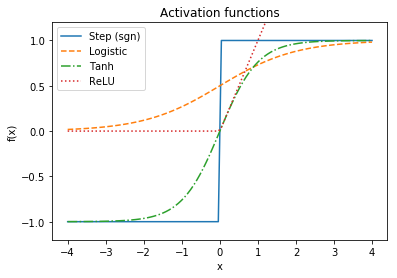

In [84]:
import numpy as np

def heaviside(X):
    return 1 * [x >= 0 for x in X]

def sgn(X):
    return [int(x > 0) - int(x < 0) for x in X]

def logistic(X):
    return 1 / (1 + np.exp(-X))

def tanh(X):
    return 2 * logistic(2 * X) - 1

def reLU(X):
    return np.maximum(0, X)

X = np.linspace(-4, 4, 100)

plt.ylim(-1.2, 1.2)
# plt.plot(X, heaviside(X), label='Step (heaviside)')
plt.plot(X, sgn(X), label='Step (sgn)', linestyle='-')
plt.plot(X, logistic(X), label='Logistic', linestyle='--')
plt.plot(X, tanh(X), label='Tanh', linestyle='-.')
plt.plot(X, reLU(X), label='ReLU', linestyle=':')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.title("Activation functions")

plt.legend()
plt.show()

In [85]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=556, activation='identity')
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

84.0

In [86]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=556, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

61.5

In [87]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=556, activation='tanh')
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

82.5

'ReLU' is widely accepted as the optimal activation function today. scikit-learn's MLPClassifier uses this as the default, so it is no surprise that there is nothing to be gained from changing it.

### E.6 Adjusting the regularization term *alpha*<a name="Part-E6"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

Changing the regularization term *alpha* from the default value of 0.0001 did not appear to help in this case:

In [88]:
# build and train the network
mlp = MLPClassifier(alpha=0.00001, hidden_layer_sizes=(2,2,2), max_iter=1000, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

87.5

In [89]:
# build and train the network
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(2,2,2), max_iter=841, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

87.5

### E.7 Cross-validation<a name="Part-E7"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

As a final test before turning our attention to other algorithms, let's quickly try cross-validation:

In [90]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
clf = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=841, random_state=0, batch_size=300)
y_ravel = y_train.values.ravel()

for train_indices, val_indices in kf.split(X_train):
    clf.fit(X_train[train_indices], y_ravel[train_indices])
    print(clf.score(X_train[val_indices], y_ravel[val_indices]))

# predict test values
predictions = clf.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

0.8
0.715
0.8


85.0

As expected, the model performs worse subjected to cross-validation, indicating that we have overfit it to the test set during hyperparameter tuning. Given more time, we could try to mitigate this by re-tuning the hyperparameters with cross-validation.

### E.8 Other algorithms<a name="Part-E8"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

In [91]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

# predict test values
predictions = logreg.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

85.5

In [92]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X_train)

# predict test values
predictions = kmeans.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

16.0

In [93]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train.values.ravel())

# predict test values
predictions = dtree.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

76.5

In [94]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train.values.ravel())

# predict test values
predictions = rforest.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

76.5

In [95]:
from sklearn.svm import SVC

# build and train the model
clf = SVC(C=6)
clf.fit(X_train, y_train.values.ravel())

# predict test values
predictions = clf.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

87.0

In [96]:
# build and train the model
clf = SVC(kernel='poly', degree=3, C=20, coef0=0.5)
clf.fit(X_train, y_train.values.ravel())

# predict test values
predictions = clf.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

83.0

In [97]:
# build and train the model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train.values.ravel())

# predict test values
predictions = clf.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

84.0

## Conclusion<a name="Conclusion"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
The neural network was as a clear winner (even though I should caution that I didn't spend much time tweaking the other models). By tweaking the variables one by one, it was possible to increase the accuracy score from an initial respectable 85.5 to 88.

The relatively high scores for the other models confirm the importance of the initial careful preparation of the data. With more time, efford and ingenuity, it would likely be possible to reach even higher.

Here is the winning configuration:

In [98]:
# build and train the network
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=841, random_state=0, batch_size=556)
mlp.fit(X_train, y_train.values.ravel())

# predict test values
predictions = mlp.predict(X_test)

# evaluate predictions
conf_matrix = confusion_matrix(y_test, predictions)
accuracy(conf_matrix)

88.0

## A final note of caution<a name="Final-note"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
In the context of this assignment, we only split the data into training and test sets, so no separate validation set.

As the quick test of k-fold cross-validation appears to confirm, this simplified method carries a risk of overfitting on the test set during hyper-parameter tuning (see <a href="#sklearn18">sklearn18</a>). For this reason, the final score is hardly a reliable estimator of the model's performance on unseen data.

However, because of the small size of the data set, the extra splitting done in cross-validation introduces further uncertainty, so this result is not entirely reliable either. As always, the best remedy would be more data.

## References<a name="References"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

<div class="col-md-1">[Geron17]</div><div class="col-md-11">Géron, Aurélien. *Hands-on machine learning with Scikit-Learn and TensorFlow*. O'Reilly Media, Inc., 2017.<a name="Geron17"></a></div>
<div>&nbsp;</div>
<div class="col-md-1">[Ng]</div><div class="col-md-11">Ng, Andrew - *Train / Dev / Test sets* (video). Coursera.<br> https://www.coursera.org/learn/deep-neural-network/lecture/cxG1s/train-dev-test-sets<a name="Ng"></a></div>
<div>&nbsp;</div>
<div class="col-md-1">[sklearn18]</div><div class="col-md-11">scikit-learn developers - *Cross-validation: evaluating estimator performance*. scikit-learn.org, 2018.<br> http://scikit-learn.org/stable/modules/cross_validation.html<a name="sklearn18"></a></div>